# Impact of Irish Government Lockdown on LAeq Noise values

<font size="3"> Analysis of mean LAeq values in the week leading up to the Irish government lockdown and the week following the lockdown on the 27th March 2020. </font>

In [1]:
#import libraries

import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import numpy 'where' to select dataframe dates before and after specified dates
import numpy as np

In [2]:
# read in noise LAeq value dataset 

df = pd.read_csv('../Data/datasets/2015_2021noise_pollution_Cleaned.csv', sep = '\t', parse_dates=['datetime'], index_col='datetime')

In [3]:
# create new df by by accessing only the rows from the week leading up to the first lockdown by the Irish government, and week after. Lockdown started 27th March 2020.

df_lockdown_start = df.copy().loc['2020-03-13':'2020-04-09'] 

In [4]:
# create a reference date for the lockdown, then use this reference date to label the data as 'pre' or 'post' lockdown for analysis

ref_date = "2020-03-27"

df_lockdown_start["lockdown"] = np.where(df_lockdown_start.index < ref_date, "pre", "post")

In [5]:
# drop unwanted columns from this dataframe
df_lockdown_start.drop(['day_of_month','day_of_week','hour_of_day'], axis = 1, inplace = True)

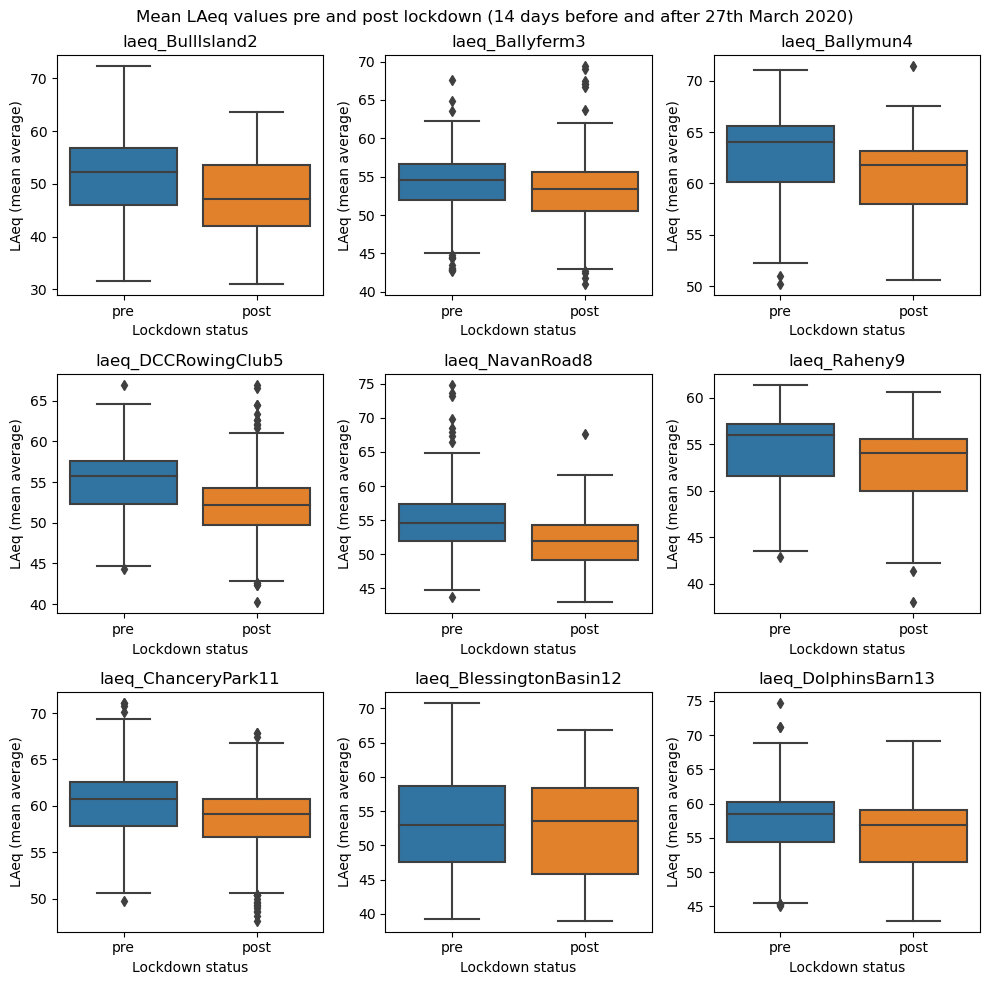

In [6]:
# Creating boxplot for means of pre-lockdown 14 days vs post-lockdown 14 days

# create column variable to loop over, and create an axis variable to loop over for subplot for each monitor

cols = df_lockdown_start.columns.drop(['lockdown']) # drop lockdown and datetime for the plotting

ax1 = [0,0,0,1,1,1,2,2,2] # co-ordinates of the axes
ax2 = [0,1,2,0,1,2,0,1,2]

fig, axs = plt.subplots(nrows = 3, ncols= 3, sharey=False, figsize = (10,10)) # create the subplot

for a,b, col in zip(ax1,ax2,cols):
    sns.boxplot(ax=axs[a, b], x = 'lockdown', y = col, data = df_lockdown_start)
    axs[a, b].set_title(col)
    axs[a,b].set_xlabel('Lockdown status')
    axs[a,b].set_ylabel('LAeq (mean average)')

fig.suptitle('Mean LAeq values pre and post lockdown (14 days before and after 27th March 2020)')

fig.tight_layout() # space out the figures

In [7]:
# Compare the average means of pre and post lockdown LAeq averages using filtering based on the 'lockdown' labels of 'pre' or 'post'

filter_pre_lockdown = df_lockdown_start['lockdown'] == 'pre'

df_prelock = df_lockdown_start[filter_pre_lockdown] # take all the rows with 'pre' lockdown
df_postlock = df_lockdown_start[~filter_pre_lockdown] # take all rows except 'pre' lockdown (so this is post lockdown)

In [8]:
# get the mean LAeq values for pre and post lockdown in to arrays

pre_lock_mean = df_prelock.mean(numeric_only=True)
post_lock_mean = df_postlock.mean(numeric_only=True)

# get the list of monitors so can combine with the means
monitors = df_lockdown_start.columns.drop(['month', 'day_name', 'date', 'part_of_week', 'lockdown'])

In [9]:
# Make a dataframe describing the pre and post lockdown means
lockdown_impact_dict = {'Monitor': monitors, 'Pre-lockdown Mean (LAeq)': pre_lock_mean, 'Post-lockdown Mean (LAeq)': post_lock_mean}
lockdown_impact_df = pd.DataFrame(lockdown_impact_dict)

# add in a column for difference of values
lockdown_impact_df['Reduction (LAeq)'] = lockdown_impact_df['Pre-lockdown Mean (LAeq)'] - lockdown_impact_df['Post-lockdown Mean (LAeq)']

In [10]:
# print the df with the reduction in noise sorted from highest to lowest and with the index column hidden

lockdown_impact_df.sort_values('Reduction (LAeq)', ascending=False).style.hide()

Monitor,Pre-lockdown Mean (LAeq),Post-lockdown Mean (LAeq),Reduction (LAeq)
laeq_BullIsland2,51.407738,47.622687,3.785052
laeq_NavanRoad8,54.690179,51.594030,3.096149
laeq_DCCRowingClub5,54.860119,51.838507,3.021612
laeq_Ballymun4,62.580655,60.428060,2.152595
laeq_Raheny9,54.209524,52.467463,1.742061
laeq_DolphinsBarn13,57.199405,55.520597,1.678808
laeq_ChanceryPark11,60.108929,58.535224,1.573705
laeq_Ballyferm3,54.020536,52.940896,1.079640
laeq_BlessingtonBasin12,52.947024,52.494925,0.452098
